In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta
import os

def generate_sales_data():
    data = []
    for i in range(500):
        data.append({
            "transaction_id": i,
            "customer_id": random.choice([None, random.randint(1, 50)]),
            "store_id": random.randint(1, 5),
            "total_amount": random.choice([random.uniform(10, 500), -50]),
            "transaction_date": datetime.now() - timedelta(days=random.randint(0, 7))
        })
    return pd.DataFrame(data)

df = generate_sales_data()

os.makedirs("data/raw", exist_ok=True)

df.to_csv("data/raw/store_sales_header.csv", index=False)
df.head(500)

,transaction_id,customer_id,store_id,total_amount,transaction_date
0,0,NaN,1,47.100304,2026-02-02 17:08:23.119122
1,1,47.0,5,108.996112,2026-02-02 17:08:23.119122
2,2,NaN,3,354.326831,2026-01-31 17:08:23.119122
3,3,1.0,3,391.855746,2026-02-01 17:08:23.119122
4,4,NaN,5,-50.000000,2026-01-31 17:08:23.119122
...,...,...,...,...,...
495,495,14.0,1,-50.000000,2026-01-30 17:08:23.121245
496,496,NaN,2,-50.000000,2026-02-01 17:08:23.121245
497,497,NaN,3,172.919311,2026-01-31 17:08:23.121245
498,498,NaN,2,-50.000000,2026-01-31 17:08:23.121245


In [2]:
!pip install Faker
import pandas as pd
import random
from faker import Faker
from datetime import timedelta

fake = Faker()

def generate_sales_data():
    data = []
    for i in range(500):
        data.append({
            "transaction_id": i,
            "customer_id": random.choice([None, fake.random_int(min=1, max=50)]),
            "store_id": fake.random_int(min=1, max=5),
            "total_amount": random.choice([
                round(fake.pyfloat(min_value=10, max_value=500), 2),
                -50
            ]),
            "transaction_date": fake.date_time_between(
                start_date='-7d',
                end_date='now'
            )
        })
    return pd.DataFrame(data)

df = generate_sales_data()
df.to_csv("data/raw/store_sales_header.csv", index=False)
df.head()


[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


,transaction_id,customer_id,store_id,total_amount,transaction_date
0,0,NaN,5,-50.00,2026-01-31 04:04:46
1,1,21.0,1,-50.00,2026-02-03 17:00:21
2,2,NaN,5,219.81,2026-01-28 20:59:19
3,3,NaN,2,220.25,2026-01-30 18:40:10
4,4,NaN,5,295.18,2026-02-01 05:55:26


In [3]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta
import random
import os

fake = Faker()
random.seed(42)
np.random.seed(42)


NUM_STORES = 5
NUM_PRODUCTS = 30
NUM_CUSTOMERS = 120
NUM_PROMOTIONS = 5
NUM_RULES = 3
NUM_TRANSACTIONS = 3000
DAYS = 180

os.makedirs("data/raw", exist_ok=True)


stores = pd.DataFrame({
    "store_id": range(1, NUM_STORES + 1),
    "store_name": [f"{fake.company()} Store" for _ in range(NUM_STORES)],
    "store_city": [fake.city() for _ in range(NUM_STORES)],
    "store_region": [fake.state() for _ in range(NUM_STORES)],
    "opening_date": [fake.date_between("-8y", "-1y") for _ in range(NUM_STORES)]
})

categories = ["Electronics", "Apparel", "Grocery", "Home", "Beauty"]

products = pd.DataFrame({
    "product_id": range(1, NUM_PRODUCTS + 1),
    "product_name": [fake.word().capitalize() for _ in range(NUM_PRODUCTS)],
    "product_category": np.random.choice(categories, NUM_PRODUCTS),
    "unit_price": np.round(np.random.uniform(50, 2000, NUM_PRODUCTS), 2)
})

customers = pd.DataFrame({
    "customer_id": range(1, NUM_CUSTOMERS + 1),
    "first_name": [fake.first_name() for _ in range(NUM_CUSTOMERS)],
    "email": [fake.email() for _ in range(NUM_CUSTOMERS)],
    "customer_phone": [fake.msisdn()[:10] for _ in range(NUM_CUSTOMERS)],
    "customer_since": [fake.date_between("-5y", "-6m") for _ in range(NUM_CUSTOMERS)],
    "loyalty_status": np.random.choice(["Bronze", "Silver", "Gold"], NUM_CUSTOMERS),
    "segment_id": np.random.choice(["HS", "AR", "REG"], NUM_CUSTOMERS)
})

promotions = pd.DataFrame({
    "promotion_id": range(1, NUM_PROMOTIONS + 1),
    "promotion_name": [f"{fake.word().capitalize()} Sale" for _ in range(NUM_PROMOTIONS)],
    "discount_percentage": np.round(np.random.uniform(5, 30, NUM_PROMOTIONS), 2),
    "applicable_category": np.random.choice(categories + ["ALL"], NUM_PROMOTIONS)
})

loyalty_rules = pd.DataFrame({
    "rule_id": range(1, NUM_RULES + 1),
    "points_per_unit_spend": [1.0, 1.5, 2.0],
    "min_spend_threshold": [0, 500, 300],
    "bonus_points": [0, 200, 100]
})


rows = []

for txn_id in range(1, NUM_TRANSACTIONS + 1):

    store = stores.sample(1).iloc[0]
    product = products.sample(1).iloc[0]
    customer = customers.sample(1).iloc[0]
    promotion = promotions.sample(1).iloc[0] if random.random() < 0.3 else None
    rule = loyalty_rules.sample(1).iloc[0]

    quantity = random.randint(1, 5)
    line_item_amount = round(quantity * product["unit_price"], 2)
    total_amount = line_item_amount


    if random.random() < 0.03:
        total_amount = -total_amount

    rows.append({
        "transaction_id": f"TXN{100000 + txn_id}",
        "transaction_date": datetime.now() - timedelta(days=random.randint(0, DAYS)),

        "store_id": store["store_id"],
        "store_name": store["store_name"],
        "store_city": store["store_city"],
        "store_region": store["store_region"],
        "opening_date": store["opening_date"],

        "product_id": product["product_id"],
        "product_name": product["product_name"],
        "product_category": product["product_category"],
        "unit_price": product["unit_price"],

        "customer_id": customer["customer_id"],
        "first_name": customer["first_name"],
        "email": customer["email"],
        "customer_phone": customer["customer_phone"],
        "customer_since": customer["customer_since"],
        "loyalty_status": customer["loyalty_status"],
        "segment_id": customer["segment_id"],

        "promotion_id": promotion["promotion_id"] if promotion is not None else None,
        "promotion_name": promotion["promotion_name"] if promotion is not None else None,
        "discount_percentage": promotion["discount_percentage"] if promotion is not None else None,
        "applicable_category": promotion["applicable_category"] if promotion is not None else None,

        "quantity": quantity,
        "line_item_amount": line_item_amount,
        "total_amount": total_amount,

        "points_per_unit_spend": rule["points_per_unit_spend"],
        "min_spend_threshold": rule["min_spend_threshold"],
        "bonus_points": rule["bonus_points"]
    })

master_df = pd.DataFrame(rows)

master_df.to_csv("data/raw/retail_analytics_master.csv", index=False)
master_df.head(3000)

,transaction_id,transaction_date,store_id,store_name,store_city,store_region,opening_date,product_id,product_name,product_category,...,promotion_id,promotion_name,discount_percentage,applicable_category,quantity,line_item_amount,total_amount,points_per_unit_spend,min_spend_threshold,bonus_points
0,TXN100001,2025-12-04 17:08:27.927295,2,Bradley Inc Store,New Patricia,Tennessee,2021-07-25,18,Boy,Beauty,...,NaN,None,NaN,None,1,287.97,287.97,1.0,0.0,0.0
1,TXN100002,2025-09-18 17:08:27.930311,5,Clark-Gray Store,South Maria,Vermont,2020-08-30,9,Task,Grocery,...,4.0,Draw Sale,17.17,ALL,1,382.52,382.52,1.5,500.0,200.0
2,TXN100003,2026-01-12 17:08:27.931328,3,Powell Group Store,South Jessica,Missouri,2024-05-10,16,Tax,Apparel,...,1.0,Situation Sale,11.26,Grocery,4,5537.00,5537.00,2.0,300.0,100.0
3,TXN100004,2025-09-14 17:08:27.933299,5,Clark-Gray Store,South Maria,Vermont,2020-08-30,9,Task,Grocery,...,3.0,Civil Sale,29.47,Beauty,5,1912.60,1912.60,1.5,500.0,200.0
4,TXN100005,2025-10-13 17:08:27.934299,2,Bradley Inc Store,New Patricia,Tennessee,2021-07-25,18,Boy,Beauty,...,4.0,Draw Sale,17.17,ALL,5,1439.85,1439.85,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,TXN102996,2025-10-26 17:08:30.436080,5,Clark-Gray Store,South Maria,Vermont,2020-08-30,7,Your,Grocery,...,NaN,None,NaN,None,2,281.16,281.16,2.0,300.0,100.0
2996,TXN102997,2025-12-25 17:08:30.436080,2,Bradley Inc Store,New Patricia,Tennessee,2021-07-25,4,Station,Beauty,...,NaN,None,NaN,None,2,878.72,878.72,1.5,500.0,200.0
2997,TXN102998,2025-09-16 17:08:30.437053,5,Clark-Gray Store,South Maria,Vermont,2020-08-30,19,Final,Electronics,...,NaN,None,NaN,None,3,3046.77,3046.77,1.5,500.0,200.0
2998,TXN102999,2026-01-30 17:08:30.438063,1,"Davies, Wells and Carr Store",Leebury,Idaho,2021-08-12,22,Run,Beauty,...,NaN,None,NaN,None,1,554.62,554.62,2.0,300.0,100.0


In [4]:
!python etl/data_quality_master.py

C:\Users\winjy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe: can't open file 'c:\\Users\\winjy\\Desktop\\Python\\Hackathon_HCL\\etl\\data_quality_master.py': [Errno 2] No such file or directory


In [5]:
import pandas as pd
from datetime import datetime
import os
import re


RAW_PATH = "data/raw/"
PROCESSED_PATH = "data/processed/"
REJECTED_PATH = "data/rejected/"

os.makedirs(PROCESSED_PATH, exist_ok=True)
os.makedirs(REJECTED_PATH, exist_ok=True)

TODAY = pd.to_datetime(datetime.today().date())


df = pd.read_csv(f"{RAW_PATH}retail_analytics_master.csv")


date_cols = [
    "transaction_date",
    "opening_date",
    "customer_since"
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")




email_regex = r"[^@]+@[^@]+\.[^@]+"
valid_categories = ["Electronics", "Apparel", "Grocery", "Home", "Beauty"]

rules = (

    df["transaction_id"].notna() &
    (df["transaction_date"] <= TODAY) &
    (df["total_amount"] > 0) &
    (df["line_item_amount"] > 0) &
    (df["quantity"] > 0) &


    df["email"].str.match(email_regex, na=False) &
    df["customer_phone"].astype(str).str.len().eq(10) &
    (df["customer_since"] <= df["transaction_date"]) &

    (df["unit_price"] > 0) &
    (df["product_category"].isin(valid_categories)) &


    (df["opening_date"] <= df["transaction_date"]) &


    (df["points_per_unit_spend"] >= 0) &
    (df["bonus_points"] >= 0) &
    (df["min_spend_threshold"] >= 0)
)


clean_df = df[rules]
rejected_df = df[~rules]


clean_df.to_csv(
    f"{PROCESSED_PATH}retail_analytics_master_clean.csv",
    index=False
)

rejected_df.to_csv(
    f"{REJECTED_PATH}retail_analytics_master_rejected.csv",
    index=False
)

print(f"Total Records     : {len(df)}")
print(f"Clean Records     : {len(clean_df)}")
print(f"Rejected Records  : {len(rejected_df)}")
print(f"Rejection Rate %  : {round((len(rejected_df)/len(df))*100, 2)}")


Total Records     : 3000
Clean Records     : 2456
Rejected Records  : 544
Rejection Rate %  : 18.13


In [6]:
import pandas as pd
import os

# ------------------------------------
# PATHS
# ------------------------------------
INPUT_PATH = "data/processed/retail_analytics_master_clean.csv"
OUTPUT_TXN_PATH = "data/processed/retail_transactions_with_loyalty.csv"
OUTPUT_CUST_PATH = "data/processed/customer_loyalty_summary.csv"

os.makedirs("data/processed", exist_ok=True)



df = pd.read_csv(INPUT_PATH)


numeric_cols = [
    "total_amount",
    "points_per_unit_spend",
    "bonus_points",
    "min_spend_threshold"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


df["base_points"] = df["total_amount"] * df["points_per_unit_spend"]

df["bonus_earned"] = df.apply(
    lambda row: row["bonus_points"]
    if row["total_amount"] >= row["min_spend_threshold"]
    else 0,
    axis=1
)

df["earned_loyalty_points"] = (
    df["base_points"] + df["bonus_earned"]
).astype(int)


customer_loyalty = (
    df.groupby(
        ["customer_id", "first_name", "email", "loyalty_status"],
        as_index=False
    )
    .agg(
        total_loyalty_points=("earned_loyalty_points", "sum"),
        total_spend=("total_amount", "sum"),
        transaction_count=("transaction_id", "nunique"),
        last_purchase_date=("transaction_date", "max")
    )
)

df.to_csv(OUTPUT_TXN_PATH, index=False)
customer_loyalty.to_csv(OUTPUT_CUST_PATH, index=False)



print(f"Transactions processed : {len(df)}")
print(f"Unique customers       : {customer_loyalty['customer_id'].nunique()}")
print(f"Total points issued    : {customer_loyalty['total_loyalty_points'].sum()}")


Transactions processed : 2456
Unique customers       : 109
Total points issued    : 11383096


In [7]:
import pandas as pd
from datetime import datetime
import os


TXN_PATH = "data/processed/retail_transactions_with_loyalty.csv"
CUST_LOYALTY_PATH = "data/processed/customer_loyalty_summary.csv"
OUTPUT_PATH = "data/processed/customer_rfm_segments.csv"

os.makedirs("data/processed", exist_ok=True)

txns = pd.read_csv(TXN_PATH)
customers = pd.read_csv(CUST_LOYALTY_PATH)

txns["transaction_date"] = pd.to_datetime(txns["transaction_date"])
customers["last_purchase_date"] = pd.to_datetime(customers["last_purchase_date"])

today = datetime.now()


rfm = (
    txns.groupby("customer_id")
    .agg(
        recency_days=("transaction_date", lambda x: (today - x.max()).days),
        frequency=("transaction_id", "nunique"),
        monetary=("total_amount", "sum")
    )
    .reset_index()
)


rfm = rfm.merge(
    customers[
        [
            "customer_id",
            "first_name",
            "email",
            "loyalty_status",
            "total_loyalty_points",
            "transaction_count"
        ]
    ],
    on="customer_id",
    how="left"
)



# High-Spenders → Top 10% by monetary value
high_spend_threshold = rfm["monetary"].quantile(0.90)

rfm["segment"] = "Regular"

rfm.loc[
    rfm["monetary"] >= high_spend_threshold,
    "segment"
] = "High-Spender"

# At-Risk → No purchase in 30+ days AND has loyalty points
rfm.loc[
    (rfm["recency_days"] > 30) &
    (rfm["total_loyalty_points"] > 0),
    "segment"
] = "At-Risk"


rfm.to_csv(OUTPUT_PATH, index=False)


print("Segment distribution:")
print(rfm["segment"].value_counts())


Segment distribution:
segment
Regular         96
High-Spender    11
At-Risk          2
Name: count, dtype: int64


In [8]:
import pandas as pd
from datetime import datetime
import os


TXN_PATH = "data/processed/retail_transactions_with_loyalty.csv"
CUST_PATH = "data/processed/customer_loyalty_summary.csv"
OUTPUT_PATH = "data/processed/customer_clv_potential.csv"

os.makedirs("data/processed", exist_ok=True)


txns = pd.read_csv(TXN_PATH)
customers = pd.read_csv(CUST_PATH)

txns["transaction_date"] = pd.to_datetime(txns["transaction_date"])
customers["last_purchase_date"] = pd.to_datetime(customers["last_purchase_date"])

today = datetime.now()




customers["AOV"] = customers["total_spend"] / customers["transaction_count"]


customers["engagement_rate"] = customers["transaction_count"] / 6  # 6 months

product_breadth = (
    txns.groupby("customer_id")["product_category"]
    .nunique()
    .reset_index(name="product_breadth")
)

customers = customers.merge(product_breadth, on="customer_id", how="left")


customers["recency_days"] = (
    today - customers["last_purchase_date"]
).dt.days


def min_max(series):
    return (series - series.min()) / (series.max() - series.min())

customers["AOV_norm"] = min_max(customers["AOV"])
customers["engagement_norm"] = min_max(customers["engagement_rate"])
customers["breadth_norm"] = min_max(customers["product_breadth"])
customers["recency_norm"] = 1 - min_max(customers["recency_days"])


customers["CLV_POTENTIAL_SCORE"] = (
    0.30 * customers["AOV_norm"] +
    0.30 * customers["engagement_norm"] +
    0.20 * customers["breadth_norm"] +
    0.20 * customers["recency_norm"]
)

# ------------------------------------
# CLASSIFICATION
# ------------------------------------
customers["CLV_POTENTIAL_SEGMENT"] = "Medium"

customers.loc[
    customers["CLV_POTENTIAL_SCORE"] >= customers["CLV_POTENTIAL_SCORE"].quantile(0.75),
    "CLV_POTENTIAL_SEGMENT"
] = "High"

customers.loc[
    customers["CLV_POTENTIAL_SCORE"] <= customers["CLV_POTENTIAL_SCORE"].quantile(0.25),
    "CLV_POTENTIAL_SEGMENT"
] = "Low"


customers[
    [
        "customer_id",
        "first_name",
        "email",
        "total_spend",
        "transaction_count",
        "AOV",
        "product_breadth",
        "engagement_rate",
        "CLV_POTENTIAL_SCORE",
        "CLV_POTENTIAL_SEGMENT"
    ]
].to_csv(OUTPUT_PATH, index=False)



print(customers["CLV_POTENTIAL_SEGMENT"].value_counts())



CLV_POTENTIAL_SEGMENT
Medium    53
Low       28
High      28
Name: count, dtype: int64


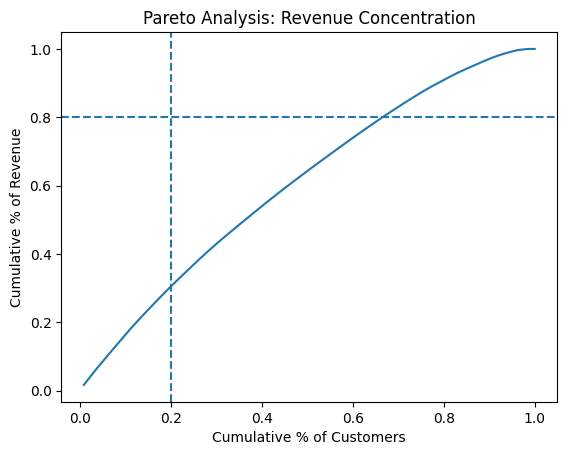

C:\Users\winjy\AppData\Local\Temp\ipykernel_26612\2898540289.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_rf = rfm.pivot_table(


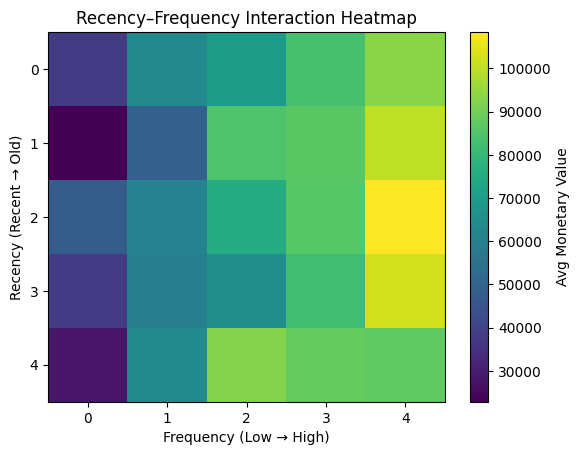

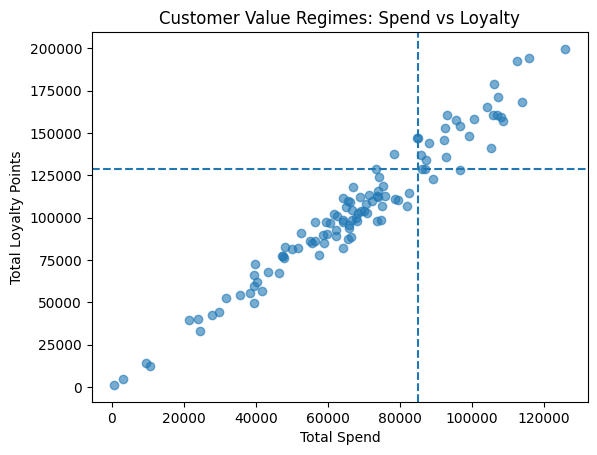

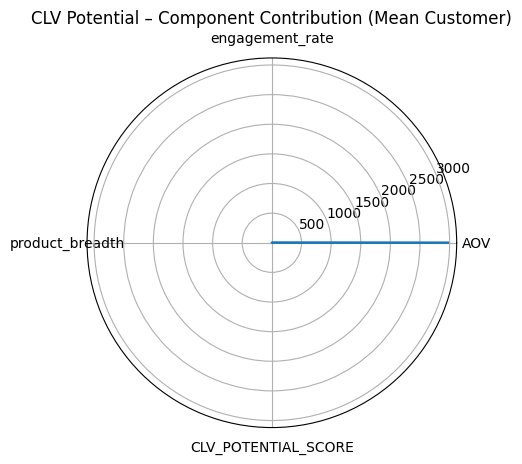

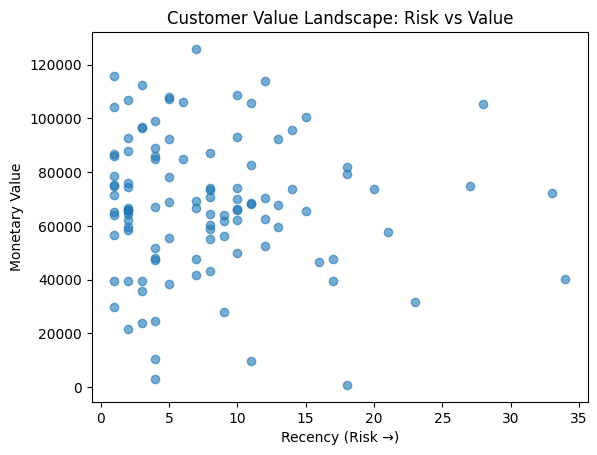

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------
# LOAD DATA
# -------------------------------------------------
rfm = pd.read_csv("data/processed/customer_rfm_segments.csv")
clv = pd.read_csv("data/processed/customer_clv_potential.csv")

# -------------------------------------------------
# 1️⃣ PARETO CURVE — VALUE CONCENTRATION
# -------------------------------------------------
rfm_sorted = rfm.sort_values("monetary", ascending=False)
rfm_sorted["cum_revenue"] = rfm_sorted["monetary"].cumsum()
rfm_sorted["cum_revenue_pct"] = rfm_sorted["cum_revenue"] / rfm_sorted["monetary"].sum()
rfm_sorted["customer_pct"] = np.arange(1, len(rfm_sorted) + 1) / len(rfm_sorted)

plt.figure()
plt.plot(rfm_sorted["customer_pct"], rfm_sorted["cum_revenue_pct"])
plt.axhline(0.8, linestyle="--")
plt.axvline(0.2, linestyle="--")
plt.xlabel("Cumulative % of Customers")
plt.ylabel("Cumulative % of Revenue")
plt.title("Pareto Analysis: Revenue Concentration")
plt.show()

# -------------------------------------------------
# 2️⃣ RECENCY × FREQUENCY INTERACTION (HEATMAP)
# -------------------------------------------------
rfm["recency_bin"] = pd.qcut(rfm["recency_days"], 5)
rfm["frequency_bin"] = pd.qcut(rfm["frequency"], 5)

pivot_rf = rfm.pivot_table(
    values="monetary",
    index="recency_bin",
    columns="frequency_bin",
    aggfunc="mean"
)

plt.figure()
plt.imshow(pivot_rf, aspect="auto")
plt.colorbar(label="Avg Monetary Value")
plt.title("Recency–Frequency Interaction Heatmap")
plt.xlabel("Frequency (Low → High)")
plt.ylabel("Recency (Recent → Old)")
plt.show()

# -------------------------------------------------
# 3️⃣ MONETARY vs LOYALTY REGIME MAP
# -------------------------------------------------
plt.figure()
plt.scatter(
    rfm["monetary"],
    rfm["total_loyalty_points"],
    alpha=0.6
)

plt.axvline(rfm["monetary"].quantile(0.75), linestyle="--")
plt.axhline(rfm["total_loyalty_points"].quantile(0.75), linestyle="--")

plt.xlabel("Total Spend")
plt.ylabel("Total Loyalty Points")
plt.title("Customer Value Regimes: Spend vs Loyalty")
plt.show()

# -------------------------------------------------
# 4️⃣ CLV SCORE DECOMPOSITION (MEAN CUSTOMER)
# -------------------------------------------------
components = clv[[
    "AOV",
    "engagement_rate",
    "product_breadth",
    "CLV_POTENTIAL_SCORE"
]].mean()

labels = components.index
values = components.values

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
values = np.concatenate((values, [values[0]]))
angles = np.concatenate((angles, [angles[0]]))

plt.figure()
ax = plt.subplot(111, polar=True)
ax.plot(angles, values)
ax.fill(angles, values, alpha=0.3)
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels)
plt.title("CLV Potential – Component Contribution (Mean Customer)")
plt.show()

# -------------------------------------------------
# 5️⃣ CUSTOMER VALUE LANDSCAPE (RISK vs VALUE)
# -------------------------------------------------
plt.figure()
plt.scatter(
    rfm["recency_days"],
    rfm["monetary"],
    alpha=0.6
)

plt.xlabel("Recency (Risk →)")
plt.ylabel("Monetary Value")
plt.title("Customer Value Landscape: Risk vs Value")
plt.show()

